## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path_products = '/content/drive/My Drive/skillbox/RecSys/products.csv'
file_path_transactions = '/content/drive/My Drive/skillbox/RecSys/transactions.csv'


In [ ]:
def download_dataset(file_path_products, file_path_transactions):
  """" Загрузка и объединение датасетов
  Вход:
    file_path_products (str): путь к файлу с продуктами
    file_path_transactions (str): путь к файлу с транзакциями
  Выход:
    data_products (pandas.core.frame.DataFrame): исходная таблица с продуктами
    data_transactions (pandas.core.frame.DataFrame): исходная таблица с транзакциями
    data_user_group (pandas.core.frame.DataFrame): конечная таблица для пользователей
    data_product_group (pandas.core.frame.DataFrame): конечная таблица для продуктов
    data_merge_group (pandas.core.frame.DataFrame): конечная суммарная таблица
  """

  data_products = pd.read_csv(file_path_products)
  data_transactions = pd.read_csv(file_path_transactions)
  # объединение по product_id
  data_merge = data_transactions.merge(data_products, left_on='product_id', right_on='product_id')

  # группировка по user_id и product_id и сортировка по кол-ву купленных товаров
  popularity = data_merge.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()
  popularity.rename(columns={'order_id': 'n_sold'}, inplace=True)
  data_merge_group = popularity.sort_values('n_sold', ascending=False)

  # группировка по user_id и сортировка по кол-ву покупок
  popularity = data_merge.groupby(['user_id'])['order_id'].count().reset_index()
  popularity.rename(columns={'order_id': 'n_buy_full'}, inplace=True)
  data_user_group = popularity.sort_values('n_buy_full', ascending=False)

  # группировка по product_id и сортировка по кол-ву покупок
  popularity = data_merge.groupby(['product_id'])['order_id'].count().reset_index()
  popularity.rename(columns={'order_id': 'n_sold_full'}, inplace=True)
  data_product_group = popularity.sort_values('n_sold_full', ascending=False)

  data_merge_group = data_merge_group.merge(data_product_group, left_on='product_id', right_on='product_id')
  data_merge_group = data_merge_group.merge(data_user_group, left_on='user_id', right_on='user_id')

  return data_products, data_transactions, data_user_group, data_product_group, data_merge_group

In [ ]:
data_products, data_transactions, data_user_group, data_product_group, data_merge_group = download_dataset(file_path_products, file_path_transactions)

In [ ]:
#Просмотр данной таблицы с продуктами
print(data_products.shape)
data_products.head()

(49688, 6)


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [ ]:
#Просмотр данной таблицы с транзакциями
print(data_transactions.shape)
data_transactions.head()

(26408073, 9)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,1,2,8,NaN,196,1.0,0.0
1,2539329,1,1,2,8,NaN,14084,2.0,0.0
2,2539329,1,1,2,8,NaN,12427,3.0,0.0
3,2539329,1,1,2,8,NaN,26088,4.0,0.0
4,2539329,1,1,2,8,NaN,26405,5.0,0.0


In [ ]:
data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26408073 entries, 0 to 26408072
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       float64
 8   reordered               float64
dtypes: float64(3), int64(6)
memory usage: 1.8 GB


In [ ]:
#Агрегированная таблица для пользователей с группировкой по идентификатору покупателя и сортировкой по количеству покупок
print(data_user_group.shape)
data_user_group.head()

(100000, 2)


,user_id,n_buy_full
97601,201268,3671
63170,129928,3638
79663,164055,3061
85550,176478,2921
88401,182401,2907


In [ ]:
#Медиана количества покупок
data_user_group.n_buy_full.median()

185.0

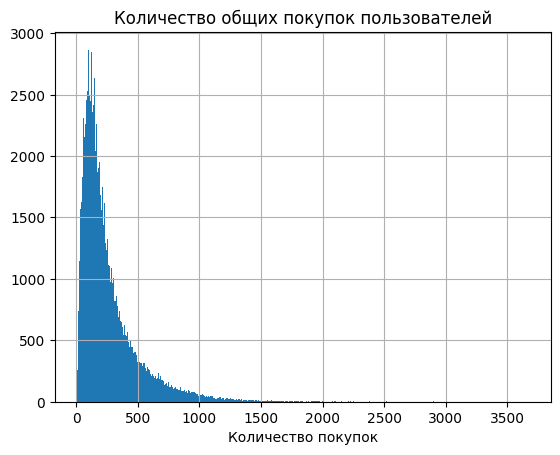

In [ ]:
data_user_group.n_buy_full.hist(bins=500)
plt.title('Количество общих покупок пользователей')
plt.xlabel('Количество покупок')
plt.show()

In [ ]:
#Агрегированная таблица для пользователей с группировкой по идентификатору товара и сортировкой по количеству покупок
print(data_product_group.shape)
data_product_group.head()

(49465, 2)


,product_id,n_sold_full
24752,24852,391170
13119,13176,321553
21052,21137,226279
21814,21903,199961
47001,47209,183702


In [ ]:
#Медиана количества покупок
data_product_group.n_sold_full.median()

46.0

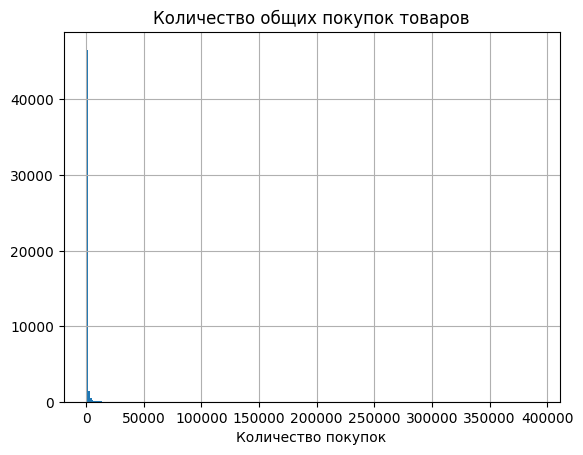

In [ ]:
data_product_group.n_sold_full.hist(bins=250)
plt.title('Количество общих покупок товаров')
plt.xlabel('Количество покупок')
plt.show()

In [ ]:
top_10_products = data_product_group.product_id.values[:10]
top_10_products

array([24852, 13176, 21137, 21903, 47209, 47766, 47626, 27845, 27966,
       26209])

In [ ]:
#Агрегированная таблица для пользователей с группировкой и по идентификатору товара и по идентификатору покупателя с сортировкой по количеству покупок
print(data_merge_group.shape)
data_merge_group.head()

(9459065, 5)


,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,17997,4210,98,29366,430


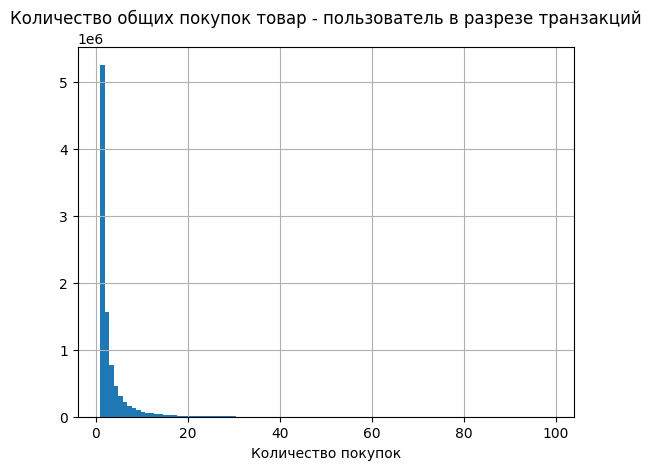

In [ ]:
data_merge_group.n_sold.hist(bins=100)
plt.title('Количество общих покупок товар - пользователь в разрезе транзакций')
plt.xlabel('Количество покупок')
plt.show()

In [ ]:
# Медиана количества покупок
data_merge_group.n_buy_full.median()

299.0

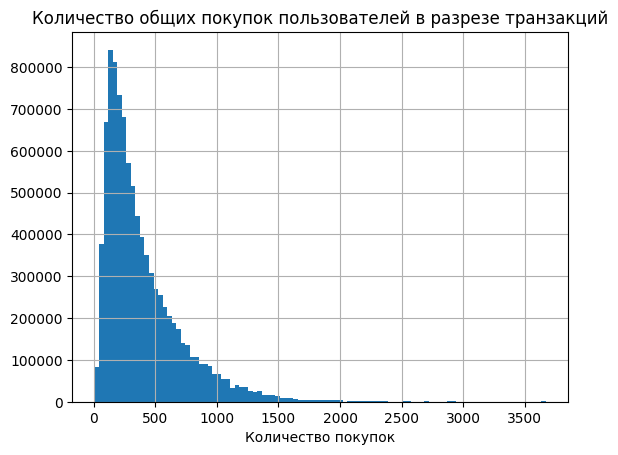

In [ ]:
data_merge_group.n_buy_full.hist(bins=100)
plt.title('Количество общих покупок пользователей в разрезе транзакций')
plt.xlabel('Количество покупок')
plt.show()

In [ ]:
# Медиана количества покупок
data_merge_group.n_sold_full.median()

3441.0

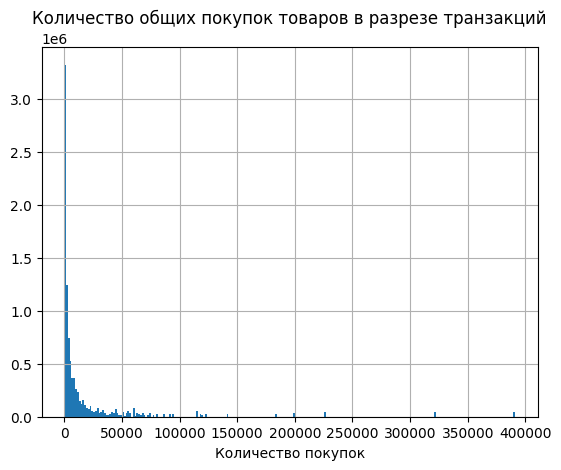

In [ ]:
data_merge_group.n_sold_full.hist(bins=250)
plt.title('Количество общих покупок товаров в разрезе транзакций')
plt.xlabel('Количество покупок')
plt.show()

In [ ]:
#Топ-10 продуктов для каждого пользователя
def define_top_10_per_user(data_merge_group, add_from_top10=False):
  """Определение для каждого пользователя топ 10 продуктов
  Вход:
    data_merge_group (pandas.core.frame.DataFrame): исходная таблица
    add_from_top10 (bool, optional): если пользователь купил меньше 10 продуктов в сумме, то добавлять из топ10 оставшиеся
  Выход:
    top_10_products_per_user (pandas.core.frame.DataFrame): итоговая таблица user_id - product_id
  """
  data_merge_group_ = data_merge_group.sort_values(by=['user_id', 'n_sold'], ascending=[True, False])
  top_10_products_per_user = data_merge_group_.groupby('user_id').head(10)
  top_10_products_per_user = top_10_products_per_user.groupby('user_id')['product_id'].apply(list).reset_index(name='top_products')
  if add_from_top10:
    top_10_products_per_user['top_products'] = top_10_products_per_user.top_products.apply(lambda x: x + list(top_10_products[:10-len(x)]))
  top_10_products_per_user['product_id'] = top_10_products_per_user.top_products.apply(lambda x: ' '.join(map(str, x)))
  return top_10_products_per_user

In [ ]:
%%time
top_10_products_per_user = define_top_10_per_user(data_merge_group)
top_10_products_per_user.head()

CPU times: user 4.47 s, sys: 314 ms, total: 4.78 s
Wall time: 4.77 s


,user_id,top_products,product_id
0,1,"[196, 12427, 10258, 25133, 46149, 13032, 49235...",196 12427 10258 25133 46149 13032 49235 13176 ...
1,2,"[32792, 47209, 24852, 19156, 1559, 18523, 3375...",32792 47209 24852 19156 1559 18523 33754 16589...
2,3,"[39190, 47766, 21903, 17668, 9387, 43961, 1819...",39190 47766 21903 17668 9387 43961 1819 16797 ...
3,7,"[40852, 37602, 17638, 21137, 31683, 13198, 492...",40852 37602 17638 21137 31683 13198 4920 30391...
4,13,"[27086, 4210, 27435, 33735, 1689, 25134, 5652,...",27086 4210 27435 33735 1689 25134 5652 43086 4...


In [ ]:
top_10_products_per_user[top_10_products_per_user.user_id == 201268]

,user_id,top_products,product_id
97601,201268,"[27521, 44632, 21709, 27344, 40604, 13176, 334...",27521 44632 21709 27344 40604 13176 33401 4142...


In [ ]:
top_10_products_per_user[['user_id', 'product_id']].to_csv('sample_submission.csv', index=False)

In [ ]:
top_10_products_per_user = define_top_10_per_user(data_merge_group, add_from_top10=True)
top_10_products_per_user.head()

,user_id,top_products,product_id
0,1,"[196, 12427, 10258, 25133, 46149, 13032, 49235...",196 12427 10258 25133 46149 13032 49235 13176 ...
1,2,"[32792, 47209, 24852, 19156, 1559, 18523, 3375...",32792 47209 24852 19156 1559 18523 33754 16589...
2,3,"[39190, 47766, 21903, 17668, 9387, 43961, 1819...",39190 47766 21903 17668 9387 43961 1819 16797 ...
3,7,"[40852, 37602, 17638, 21137, 31683, 13198, 492...",40852 37602 17638 21137 31683 13198 4920 30391...
4,13,"[27086, 4210, 27435, 33735, 1689, 25134, 5652,...",27086 4210 27435 33735 1689 25134 5652 43086 4...


In [ ]:
top_10_products_per_user[['user_id', 'product_id']].to_csv('sample_submission.csv', index=False)

### Формирование обучающих данных и обучение модели

In [ ]:
#Гиперпараметры
n_delete_min = 20
n_delete_max = 1e10
mode_prepare = 'delete'
column = 'n_sold'

In [ ]:
data_merge_group.shape, data_merge_group.user_id.nunique(), data_merge_group.product_id.nunique()

((9459065, 5), 100000, 49465)

In [ ]:
def prepare_dataset(data_merge_group, n_delete_min, n_delete_max, mode_prepare, column):
  """ Подготовка датасета
  Вход:
    data_merge_group (pandas.core.frame.DataFrame): исходная таблица до замены / удаления
    n_delete_min (int): все что меньше будет удалено / заменено
    n_delete_max (int): все что выше будет удалено / заменено
    mode_prepare (str): какой режим: удаление / замена
      replace - заменяем id продуктов, где покупок меньше n_delete_min, на 0
      delete - удаляем данные где покупок меньше n_delete_min и больше n_delete_max для пользователя-продукта
    column (str): колонка относительно которой происходит удаление / замена
      n_sold - количество покупок в паре пользователь - продукт
      n_sold_full - общее количество покупок для каждого продутка
  Выход
    data_merge_group_new_1 (pandas.core.frame.DataFrame): итоговая таблица после замены / удаления
  """
  if mode_prepare == 'replace':
    data_merge_group_new_1 = data_merge_group.copy()
    data_merge_group_new_1.product_id.loc[data_merge_group_new_1[data_merge_group_new_1[column] <= n_delete_min].index] = 0

  if mode_prepare == 'delete':
    data_merge_group_new_1 = data_merge_group[(data_merge_group[column] > n_delete_min) & (data_merge_group[column] < n_delete_max)]

  return data_merge_group_new_1

In [ ]:
data_merge_group_new_1 = prepare_dataset(data_merge_group, n_delete_min, n_delete_max, mode_prepare, column)
print(data_merge_group_new_1.shape, data_merge_group_new_1.user_id.nunique(), data_merge_group_new_1.product_id.nunique())
data_merge_group_new_1.tail()

(98648, 5) 24331 9652


,user_id,product_id,n_sold,n_sold_full,n_buy_full
98643,203694,42756,21,632,412
98644,143024,37718,21,4335,493
98645,94343,21903,21,199961,408
98646,68439,24964,21,91792,1347
98647,23371,45066,21,66175,2311


In [ ]:
#импорт для построения разряженной матрицы
from scipy.sparse import csr_matrix, coo_matrix

In [ ]:
weight = True
weight_column = 'n_sold'

In [ ]:
def prepare_coo_matrix_for_collaborative_filtering(data_merge_group_new_1, weight, weight_column=None):
  """Подготовка разреженной матрицы для коллаборативной фильтрации
  Вход:
    data_merge_group_new_1 (pandas.core.frame.DataFrame): исходная таблица
    weight (bool): веса взвешенные или нет
    weight_column (str, optional): столбец по которой строится разряженная матрица
      n_sold - на основе кол-ва продаж user-product
      n_sold_full - на основе общих кол-ва продаж
  Выход:
    sparse_user_item (scipy.sparse._csr.csr_matrix): разреженная матрица признаков
    users_inv_mapping (dict): мапинг пользователей
    users_mapping (dict): обратный мапинг пользователей
    items_inv_mapping (dict): мапинг продуктов
    items_mapping (dict): обратный мапинг продуктов
  """
  users_inv_mapping = dict(enumerate(data_merge_group_new_1['user_id'].unique()))
  users_mapping = {v: k for k, v in users_inv_mapping.items()}
  print(f'len(users_mapping) = {len(users_mapping)}')
  items_inv_mapping = dict(enumerate(data_merge_group_new_1['product_id'].unique()))
  items_mapping = {v: k for k, v in items_inv_mapping.items()}
  print(f'len(items_mapping) = {len(items_mapping)}')
  row = data_merge_group_new_1['user_id'].map(users_mapping.get)
  col = data_merge_group_new_1['product_id'].map(items_mapping.get)
  if not weight:
    data = np.ones(data_merge_group_new_1.shape[0])
  else:
    data =  data_merge_group_new_1[weight_column].tolist()
  coo = coo_matrix((data, (row, col)),)
  sparse_user_item = coo.tocsr()
  return sparse_user_item, users_inv_mapping, users_mapping, items_inv_mapping, items_mapping

In [ ]:
sparse_user_item, users_inv_mapping, users_mapping, items_inv_mapping, items_mapping = prepare_coo_matrix_for_collaborative_filtering(
    data_merge_group_new_1,
    weight,
    weight_column)
sparse_user_item

len(users_mapping) = 24331
len(items_mapping) = 9652


<24331x9652 sparse matrix of type '<class 'numpy.int64'>'
	with 98648 stored elements in Compressed Sparse Row format>

In [ ]:
#установка библиотеки для коллаборативной фильтрации
!pip install implicit

In [ ]:
from implicit.nearest_neighbours import ItemItemRecommender, CosineRecommender, TFIDFRecommender, BM25Recommender
from implicit.als import AlternatingLeastSquares

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

2

In [ ]:
#Задание гиперпараметров
show_progress=True
factors=500
iterations=3
regularization=0.01
num_threads=4
random_state=42

In [ ]:
def train_collaborative_filtering(
    sparse_user_item,
    show_progress,
    factors,
    iterations,
    regularization,
    num_threads,
    random_state
):
  """ Обучение для коллаборативной фильтрации
  Вход:
    sparse_user_item (scipy.sparse._csr.csr_matrix): разреженная матрица признаков
    show_progress(bool): показывать прогресс во время обучения или нет
    factors (int): количество скрытых параметров для обучения
    iterations  (int): количество итераций во время обучения модели
    regularization (float): признак регуляризации
    num_threads (int): количество потоков для обучения модели и формирования батчей
    random_state (int): случайная величина для старта обучения и пользовательских параметров
  Выход:
    model (implicit.cpu.als.AlternatingLeastSquares): модель
  """
  model = AlternatingLeastSquares(
      factors=factors,
      iterations=iterations,
      regularization=regularization,
      num_threads=num_threads,
      random_state=random_state
    )
  model.fit(sparse_user_item,
            show_progress=show_progress)
  return model

In [ ]:
model_col_fil = train_collaborative_filtering(sparse_user_item, show_progress, factors, iterations, regularization, num_threads, random_state)

/usr/local/lib/python3.10/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/3 [00:00<?, ?it/s]

### Инференс обученной модели

In [ ]:
mode_inference = 'top_10_per_user'

In [ ]:
def inference_collaborative_filtering(
    K,
    model,
    inference_all,
    userids=None,
    mode_prepare='delete',
    mode_inference='top_10_per_user'
):
  """ Инференс для коллаборативной фильтрации
  Вход:
    K (int): количество предсказаний
    model (implicit.cpu.als.AlternatingLeastSquares): модель
    inference_all (bool): делать ли рекоммендации для всех пользователей
    userids (list, optional): реальные id пользователя для которого делать предсказаниеm, если inference_all=False
    mode_prepare (str, optional): какой режим: удаление / замена
    mode_inference (str, optional): что добавлять в недостающие айдишники
      top_10_for_all_products - добавление недостающих айдишников и присваивание им топ10 продуктов из всех
      top_10_per_user - добавление недостающих айдишников и присваивание им топ10 продуктов, которые они покупали,
      если купленных товаров меньше 10, то добавляются самые популярные
  Выход:
    data_res (pandas.core.frame.DataFrame): итоговая таблица user_id - product_id
  """
  if inference_all:
    all_users = data_merge_group.user_id.unique() #все уникальные id
    userids = list(users_mapping.values()) #id замапленных пользователей из обучающей выборки
  else:
    all_users = userids #все уникальные id
    userids = [users_mapping.get(userid, '') for userid in userids] #id замапленных пользователей из обучающей выборки

  user_id = [users_inv_mapping.get(userid, '') for userid in userids if userid != ''] #id из обучающей выборки
  product_id = []
  for userid in tqdm(userids):
    if userid != '':
      recs = model.recommend(userid=userid,
                            user_items=sparse_user_item,
                            N=K,
                            filter_already_liked_items=False,
                            filter_items=[items_mapping[0]] if mode_prepare=='replace' else None,
                            )
      res_ids = [items_inv_mapping[item_id] for item_id in recs[0]]
      product_id.append(' '.join(map(str, res_ids)))

  #добавление недостающих id
  for element in all_users:
    if element not in user_id:
      user_id.append(element)
      if mode_inference == 'top_10_per_user':
        top_10_products_per_user_ = top_10_products_per_user[top_10_products_per_user.user_id == element].top_products.values[0]
        top_10_products_per_user_ = top_10_products_per_user_ + list(top_10_products[:10-len(top_10_products_per_user_)])
      elif mode_inference == 'top_10_for_all_products':
        top_10_products_per_user_ = top_10_products
      product_id.append(' '.join(map(str, top_10_products_per_user_)))
  data_res = pd.DataFrame({'user_id': user_id, 'product_id': product_id})
  return data_res

In [ ]:
data_res = inference_collaborative_filtering(K=10,
                                             model=model_col_fil,
                                             inference_all=False,
                                             userids=[41356, 20121, 169740])
data_res

100%|██████████| 3/3 [00:00<00:00, 700.61it/s]


,user_id,product_id
0,41356,8518 14366 41950 26209 11187 38689 40910 6583 ...
1,20121,17426 24852 13176 21137 21903 47209 47766 4762...
2,169740,35894 33493 13948 19343 36051 500 24852 13176 ...


In [ ]:
data_res = inference_collaborative_filtering(K=10,
                                             model=model_col_fil,
                                             inference_all=True)
data_res

100%|██████████| 24331/24331 [00:38<00:00, 637.22it/s]


,user_id,product_id
0,41356,8518 14366 41950 26209 11187 38689 40910 6583 ...
1,17997,27086 4210 27730 19348 41290 43858 14084 40571...
2,141736,49235 30489 42342 35221 44632 44987 35951 1494...
3,103593,39928 39877 4920 12341 47209 46906 3999 8174 3...
4,99707,39408 47144 30183 21709 45066 27730 10957 1676...
...,...,...
99995,73726,40516 15285 17044 2962 327 29615 35181 4656 50...
99996,76162,16953 5161 8843 37710 49235 48812 45638 42500 ...
99997,71689,19552 11777 38607 31562 31564 38203 39812 4061...
99998,73281,2915 34330 13559 15424 45840 40256 24184 25089...


In [ ]:
data_res.to_csv('sample_submission.csv', index=False)

In [ ]:
data_res = pd.read_csv('sample_submission.csv')
data_res.head()

,user_id,product_id
0,41356,8518 14366 41950 26209 11187 38689 40910 6583 ...
1,17997,27086 4210 27730 19348 41290 43858 14084 40571...
2,141736,49235 30489 42342 35221 44632 44987 35951 1494...
3,103593,39928 39877 4920 12341 47209 46906 3999 8174 3...
4,99707,39408 47144 30183 21709 45066 27730 10957 1676...


In [ ]:
data_res.tail()

,user_id,product_id
99995,73726,40516 15285 17044 2962 327 29615 35181 4656 50...
99996,76162,16953 5161 8843 37710 49235 48812 45638 42500 ...
99997,71689,19552 11777 38607 31562 31564 38203 39812 4061...
99998,73281,2915 34330 13559 15424 45840 40256 24184 25089...
99999,116236,37417 36956 35561 35221 34281 34220 31040 3048...


In [ ]:
data_merge_group.head(20)

,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,17997,4210,98,29366,430
5,141736,25133,98,5515,1224
6,103593,28204,98,74184,1417
7,99707,24852,97,391170,1117
8,120897,12013,97,2933,565
9,99753,27845,96,118954,191


In [ ]:
!pip install lightfm

In [ ]:
from lightfm.data import Dataset
from lightfm import LightFM
import nltk
import string
from gensim.models import FastText
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
#Формирование признаков
products_features_digit = ['n_sold_full'] # 'n_sold_full'
products_features_text = [] # 'product_name',	'aisle',	'department'
products_features = products_features_digit + [f'{products_feature_text}_vec' for products_feature_text in products_features_text]
users_features_digit = ['n_buy_full'] # 'n_buy_full'
users_features_text = [] # 'order_dow',	'order_hour_of_day' , 'days_since_prior_order',
users_features = users_features_digit + [f'{users_feature_text}_vec' for users_feature_text in users_features_text]
products_features, users_features

(['n_sold_full'], ['n_buy_full'])

In [ ]:
def generate_feature_list(dataframe, features_name):
    # features = dataframe[features_name].apply(
    #     lambda x: ','.join(x.map(str)), axis=1)
    # features = features.str.split(',')
    # если числовой признак:
    # features = features.apply(lambda x: [int(feature) if feature.isdigit() else feature for feature in x])
    features = dataframe[features_name].apply(lambda row: list(row), axis=1)
    features = features.apply(pd.Series).stack().reset_index(drop=True)
    return features

def create_features(dataframe, features_name, id_col_name):
    # features = dataframe[features_name].apply(
    #     lambda x: ','.join(x.map(str)), axis=1)
    # features = features.str.split(',')
    # # если числовой признак:
    # features = features.apply(lambda x: [int(feature) if feature.isdigit() else feature for feature in x])
    features = dataframe[features_name].apply(lambda row: list(row), axis=1)
    features = list(zip(dataframe[id_col_name], features))
    return features

In [ ]:
def tokenize_text(raw_text):
    """Функция для токенизации текста
    Вход:
      raw_text (str): исходная текстовая строка
    Выход:
      tokens (list): список токенов
    """
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if (i not in string.punctuation)]
    return tokens

In [ ]:
def prepare_features_for_lightFM(data_products,
                                 data_transactions,
                                 products_features,
                                 users_features,
                                 products_features_text,
                                 users_features_text):
  """ Подготовка признаков
  Вход:
    data_products (pandas.core.frame.DataFrame): исходная таблица с продуктами
    data_transactions (pandas.core.frame.DataFrame): исходная таблица с транзакциями
    products_features (list): список всех признаков продуктов
    users_features (list): список всех признаков пользователей
    products_features_text (list): список текстовых признаков продуктов
    users_features_text (list): список текстовых признаков пользователей
  Выход:
    dataset (lightfm.data.Dataset): датасет
    data_products (pandas.core.frame.DataFrame): конечная таблица с продуктами
    data_users (pandas.core.frame.DataFrame): конечная таблица с пользователями
  """
  data_products = data_products.merge(data_product_group, left_on='product_id', right_on='product_id', how='outer')
  if 'n_sold_full' in data_products.columns:
    data_products.n_sold_full = data_products.n_sold_full.fillna(value=0)
    data_products.n_sold_full = data_products.n_sold_full.astype(int)
  data_users = data_transactions.groupby(['user_id'])[['order_dow',	'order_hour_of_day', 'days_since_prior_order']].median().reset_index()
  data_users = data_users.merge(data_user_group, left_on='user_id', right_on='user_id', how='outer')
  # векторизация текстовых признаков - продукты
  for feature in products_features_text:
    text_tok = data_products[f'{feature}'].apply(tokenize_text).values
    data_products[f'{feature}_tok'] = text_tok
    texts = data_products[f'{feature}_tok'].values
    ft = FastText(sentences=texts, vector_size=16, min_count=1, epochs=10)
    data_products[f'{feature}_vec'] = data_products[f'{feature}_tok'].apply(lambda x: tuple(ft.wv[x][0]))
  print(f'')
  # векторизация текстовых признаков - пользователи
  for feature in users_features_text:
    text_tok = data_users[f'{feature}'].apply(tokenize_text).values
    data_users[f'{feature}_tok'] = text_tok
    texts = data_users[f'{feature}_tok'].values
    ft = FastText(sentences=texts, vector_size=16, min_count=1, epochs=10)
    # ft.wv.most_similar('snacks')
    data_users[f'{feature}_vec'] = data_users[f'{feature}_tok'].apply(lambda x: tuple(ft.wv[x][0]))
  dataset = Dataset()
  dataset.fit(
      set(data_transactions['user_id']),
      set(data_products['product_id']))
  if products_features:
    products_feature_list = generate_feature_list(
        data_products,
        products_features
        )
    print(f'products_feature_list = {products_feature_list}')
    data_products['products_features'] = create_features(
        data_products,
        products_features,
        'product_id')
    dataset.fit_partial(
      item_features=products_feature_list)
  if users_features:
    users_feature_list = generate_feature_list(
        data_users,
        users_features)
    data_users['user_features'] = create_features(
      data_users,
      users_features,
      'user_id')
    dataset.fit_partial(
      user_features=users_feature_list)
  return dataset, data_products, data_users

In [ ]:
dataset, data_products, data_users = prepare_features_for_lightFM(
    data_products,
    data_transactions,
    products_features,
    users_features,
    products_features_text,
    users_features_text
)


products_feature_list = 0        1549
1          80
2         242
3         215
4          11
         ... 
49683       5
49684      36
49685     111
49686       9
49687      55
Length: 49688, dtype: int64


In [ ]:
print(data_products.shape)
data_products.head()

(49688, 8)


,product_id,product_name,aisle_id,department_id,aisle,department,n_sold_full,products_features
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1549,"(1, [1549])"
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,80,"(2, [80])"
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,242,"(3, [242])"
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,215,"(4, [215])"
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,11,"(5, [11])"


In [ ]:
data_products.department.nunique(), data_products.aisle.nunique(), data_products.product_name.nunique()

(21, 134, 49688)

In [ ]:
print(data_users.shape)
data_users.head()

(100000, 6)


,user_id,order_dow,order_hour_of_day,days_since_prior_order,n_buy_full,user_features
0,1,3.0,9.0,20.5,59,"(1, [59])"
1,2,2.0,10.0,13.0,195,"(2, [195])"
2,3,0.0,16.0,9.0,82,"(3, [82])"
3,7,1.0,13.0,9.0,206,"(7, [206])"
4,13,6.0,14.0,7.0,81,"(13, [81])"


In [ ]:
weight = False
weight_column = 'n_sold'

In [ ]:
def prepare_coo_matrix_for_lightFM(dataset, data_merge_group_new_1, data_users, data_products, weight, weight_column=None):
  """Подготовка разряженной матрицы для lightFM
  Вход:
    dataset
    data_merge_group_new_1 (pandas.core.frame.DataFrame): исходная таблица
    data_users (pandas.core.frame.DataFrame): таблица с признаками пользователей
    data_products (pandas.core.frame.DataFrame): таблица с признаками продуктов
    weight (bool): взвешенные веса или нет
    weight_column (str, optional): столбец для построения разряженной матрицы, если веса взвешенные
      n_sold - на основе кол-ва продаж user-product
      n_sold_full - на основе общих кол-ва продаж
  Выход:
    interactions (scipy.sparse._csr.csr_matrix): разреженная матрица признаков
    weights (scipy.sparse._csr.csr_matrix): разреженная матрица весов
    user_features (scipy.sparse._csr.csr_matrix): разреженная матрица признаков пользователей
    products_features (scipy.sparse._csr.csr_matrix): разреженная матрица признаков продуктов
    lightfm_mapping (dict): маппинг
  """
  lightfm_mapping = dataset.mapping()
  lightfm_mapping = {
      'users_mapping': lightfm_mapping[0],
      'user_features_mapping': lightfm_mapping[1],
      'items_mapping': lightfm_mapping[2],
      'item_features_mapping': lightfm_mapping[3],
  }
  lightfm_mapping['users_inv_mapping'] = {v: k for k, v in lightfm_mapping['users_mapping'].items()}
  lightfm_mapping['items_inv_mapping'] = {v: k for k, v in lightfm_mapping['items_mapping'].items()}

  if not weight:
    # без учета весов
    data_merge_group_new_1['user_product_id_tuple'] = list(zip(
        data_merge_group_new_1.user_id,
        data_merge_group_new_1.product_id))
  else:
    # с учетом весов
    data_merge_group_new_1['total_weights'] = data_merge_group_new_1[weight_column]
    data_merge_group_new_1['user_product_id_tuple'] = list(zip(
        data_merge_group_new_1.user_id,
        data_merge_group_new_1.product_id,
        data_merge_group_new_1.total_weights))
  interactions, weights = dataset.build_interactions(
    data_merge_group_new_1['user_product_id_tuple'])
  if 'user_features' in data_users.columns:
    user_features = dataset.build_user_features(
        data_users['user_features'])
    print(f'user_features.shape = {user_features.shape}')
  else:
    user_features = None
  if 'products_features' in data_products.columns:
    products_features = dataset.build_item_features(
        data_products['products_features'])
    print(f'products_features.shape = {products_features.shape}')
  else:
    products_features = None
  return interactions, weights, user_features, products_features, lightfm_mapping

In [ ]:
interactions, weights, user_features, products_features, lightfm_mapping = prepare_coo_matrix_for_lightFM(
    dataset,
    data_merge_group_new_1,
    data_users,
    data_products,
    weight,
    weight_column)

<ipython-input-63-a9f31f0fc0f9>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge_group_new_1['user_product_id_tuple'] = list(zip(


user_features.shape = (100000, 100888)
products_features.shape = (49688, 49733)


In [ ]:
interactions, weights

(<100000x49688 sparse matrix of type '<class 'numpy.int32'>'
 	with 98648 stored elements in COOrdinate format>,
 <100000x49688 sparse matrix of type '<class 'numpy.float32'>'
 	with 98648 stored elements in COOrdinate format>)

In [ ]:
print(data_merge_group_new_1.shape)
data_merge_group_new_1.head()

(98648, 6)


,user_id,product_id,n_sold,n_sold_full,n_buy_full,user_product_id_tuple
0,41356,6583,99,697,1554,"(41356, 6583)"
1,41356,14366,99,1473,1554,"(41356, 14366)"
2,41356,38652,99,598,1554,"(41356, 38652)"
3,41356,29671,98,527,1554,"(41356, 29671)"
4,17997,4210,98,29366,430,"(17997, 4210)"


###Обучение модели

In [ ]:
#Задание параметров
epochs=100
num_threads=4
verbose=True
no_components=256
learning_rate=0.05
loss='warp'
random_state=42
item_alpha=1e-09
user_alpha=1e-09

In [ ]:
def train_lightFM(
    interactions,
    products_features,
    user_features,
    weights,
    epochs,
    num_threads,
    verbose,
    no_components,
    learning_rate,
    loss,
    random_state,
    item_alpha,
):
  """ Обучение для lightFM
  Вход:
    interactions (np.float32 coo_matrix of shape [n_users, n_items]): матрица содержащая взаимодействия user-item
    products_features (np.float32 csr_matrix of shape [n_items, n_item_features]): веса элемента для products_features
    user_features (np.float32 csr_matrix of shape [n_users, n_user_features]): веса элемента для user_features
    weights  (np.float32 coo_matrix of shape [n_users, n_items]): матрица с весами индивидуального взаимодействия
    epochs (int): количество эпох
    num_threads  (int): количество потоков для параллельных вычислений
    verbose (bool): логирование сообщения об обучении
    no_components (int): размерность скрытых эмбедингов
    learning_rate (float): стартовая скорость обучения модели
    loss (string): one of (‘logistic’, ‘bpr’, ‘warp’, ‘warp-kos’) - функция потерь
    random_state(int): псевдо случайное число для перемешивания данных и инициализации параметров
    item_alpha (float): функция штрафов за ошибки.
  Выход:
    model (lightfm.lightfm.LightFM): модель
  """
  model = LightFM(
      no_components=no_components,
      learning_rate=learning_rate,
      loss=loss,
      random_state=random_state,
      item_alpha=item_alpha,
      )
  model.fit(
      interactions,
      item_features=products_features,
      user_features=user_features,
      sample_weight=weights,
      epochs=epochs,
      num_threads=num_threads,
      verbose=verbose,
  )
  return model

In [ ]:
model_lightFM = train_lightFM(
    interactions,
    products_features,
    user_features,
    weights,
    epochs,
    num_threads,
    verbose,
    no_components,
    learning_rate,
    loss,
    random_state,
    item_alpha,
)

Epoch: 100%|██████████| 100/100 [02:15<00:00,  1.36s/it]


### Инференс

In [ ]:
def inference_lightFM(
    K,
    model,
    inference_all,
    userids=None,
    mode_prepare='replace',
    coo_matrix_from_col_fil=False
):
  """ Инференс для lightFM
  Вход:
    K (int): количество предсказаний
    model (lightfm.lightfm.LightFM): модель
    inference_all (bool): делать ли рекомендации для всех пользователей
    userids (list, optional): id пользователя для которого делать предсказаниеm, если inference_all=False
    lightfm_mapping (dict): мэпинги
    mode_prepare (str, optional): режим удаления/замены
    coo_matrix_from_col_fil (bool, optional)
  Выход:
    data_res (pandas.core.frame.DataFrame): итоговая таблица user_id - product_id
  """
  if coo_matrix_from_col_fil:
    item_ids=list(items_mapping.values())
    item_ids_dict_inv = items_inv_mapping
    if inference_all:
      userids = users_mapping.values()
    user_id = [users_inv_mapping[userid] for userid in userids]
  else:
    item_ids=list(lightfm_mapping['items_mapping'].values())
    item_ids_dict_inv = lightfm_mapping['items_inv_mapping']
    if inference_all:
      userids = lightfm_mapping['users_mapping'].values()
    else:
      userids = [lightfm_mapping['users_mapping'][userid] for userid in userids]
    user_id = [lightfm_mapping['users_inv_mapping'][userid] for userid in userids]

  if coo_matrix_from_col_fil and mode_prepare=='replace':
    K += 1
  res = []
  for userid in tqdm(userids):
    scores = model.predict(
            user_ids=userid,
            item_ids=item_ids,
            item_features=products_features,
            user_features=user_features,
            num_threads=4)
    ids = np.argpartition(scores, -np.arange(K))[-K:][::-1]
    res_ids = [item_ids_dict_inv[ids_] for ids_ in ids]
    product_id = ' '.join(map(str, res_ids))
    res.append(product_id)
    if coo_matrix_from_col_fil and mode_prepare=='replace':
      res_ids.remove(0) if 0 in res_ids else res_ids[:-1]
  product_id = res
  data_res = pd.DataFrame({'user_id': user_id, 'product_id': product_id})
  return data_res

In [ ]:
data_res = inference_lightFM(K=10,
                             model=model_lightFM,
                             inference_all=False,
                             userids=[1, 7])
data_res

100%|██████████| 2/2 [00:00<00:00, 15.01it/s]


,user_id,product_id
0,1,24852 38928 6184 43352 21386 196 13176 38768 3...
1,7,13176 24852 21903 19660 12341 196 16797 38928 ...


In [ ]:
data_res = inference_lightFM(K=10,
                             model=model_lightFM,
                             inference_all=True)
data_res

100%|██████████| 100000/100000 [2:12:22<00:00, 12.59it/s]


,user_id,product_id
0,1,24852 38928 6184 43352 21386 196 13176 38768 3...
1,2,13176 24852 12341 6184 196 43154 30827 20940 4...
2,3,24852 13176 196 13575 32478 49235 19660 38928 ...
3,7,13176 24852 21903 19660 12341 196 16797 38928 ...
4,13,24852 6184 13176 32478 38928 30827 12341 20940...
...,...,...
99995,206202,24852 13176 12341 49235 6184 16797 37710 19660...
99996,206206,24852 13176 47209 27086 4472 27845 27966 49235...
99997,206207,24852 13176 16797 27845 27086 4920 28204 21903...
99998,206208,24852 34213 5161 45279 18656 21137 13176 27086...


In [ ]:
data_res.to_csv('sample_submission.csv', index=False)

In [ ]:
data_res = pd.read_csv('sample_submission.csv')
data_res.head()

,user_id,product_id
0,1,24852 38928 6184 43352 21386 196 13176 38768 3...
1,2,13176 24852 12341 6184 196 43154 30827 20940 4...
2,3,24852 13176 196 13575 32478 49235 19660 38928 ...
3,7,13176 24852 21903 19660 12341 196 16797 38928 ...
4,13,24852 6184 13176 32478 38928 30827 12341 20940...


In [ ]:
data_res.tail()

,user_id,product_id
99995,206202,24852 13176 12341 49235 6184 16797 37710 19660...
99996,206206,24852 13176 47209 27086 4472 27845 27966 49235...
99997,206207,24852 13176 16797 27845 27086 4920 28204 21903...
99998,206208,24852 34213 5161 45279 18656 21137 13176 27086...
99999,206209,13176 24852 6184 43352 12341 196 49235 38928 2...


In [ ]:
data_merge_group.head(20)

,user_id,product_id,n_sold,n_sold_full,n_buy_full
0,41356,6583,99,697,1554
1,41356,14366,99,1473,1554
2,41356,38652,99,598,1554
3,41356,29671,98,527,1554
4,17997,4210,98,29366,430
5,141736,25133,98,5515,1224
6,103593,28204,98,74184,1417
7,99707,24852,97,391170,1117
8,120897,12013,97,2933,565
9,99753,27845,96,118954,191


In [ ]:
data_product_group.head(10)

,product_id,n_sold_full
24752,24852,391170
13119,13176,321553
21052,21137,226279
21814,21903,199961
47001,47209,183702
47555,47766,141632
47417,47626,122080
27728,27845,118954
27849,27966,118073
26099,26209,115506


### Сравнение результатов

In [ ]:
import matplotlib.pyplot as plt

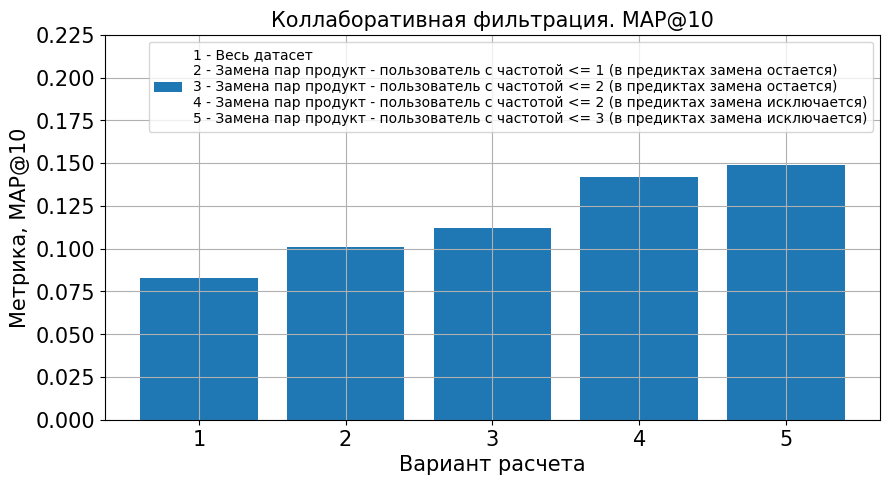

In [ ]:
results = [0.0827, 0.101, 0.112, 0.142, 0.149,]
index = np.arange(1, len(results) + 1)

plt.figure(figsize=(10, 5))
plt.bar(index, results)
plt.title('Коллаборативная фильтрация. MAP@10', fontsize = 15)
plt.xticks(index,index, rotation = 0, fontsize = 15)
plt.legend([
'1 - Весь датасет\n\
2 - Замена пар продукт - пользователь с частотой <= 1 (в предиктах замена остается)\n\
3 - Замена пар продукт - пользователь с частотой <= 2 (в предиктах замена остается)\n\
4 - Замена пар продукт - пользователь с частотой <= 2 (в предиктах замена исключается)\n\
5 - Замена пар продукт - пользователь с частотой <= 3 (в предиктах замена исключается)'],
           fontsize = 10)
plt.yticks(fontsize = 15)
plt.ylim([0, 0.225])
plt.xlabel('Вариант расчета', fontsize = 15)
plt.ylabel('Метрика, MAP@10', fontsize = 15)
plt.grid()

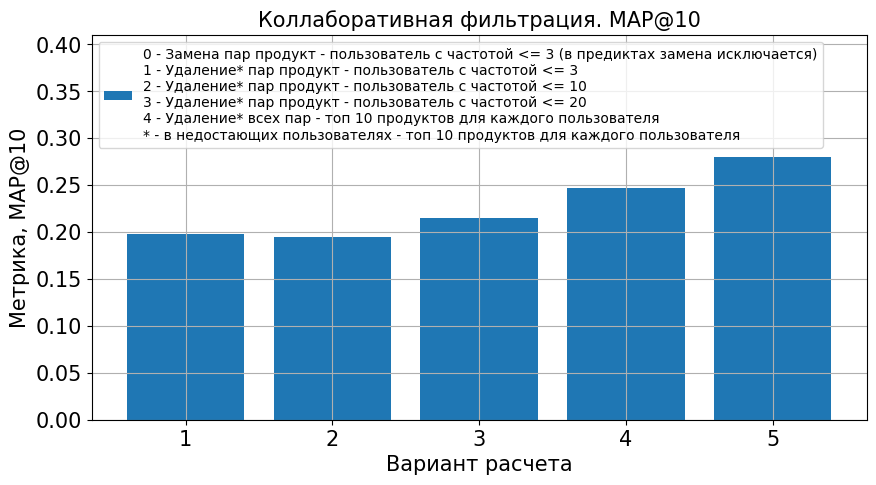

In [ ]:
results = [0.198, 0.195, 0.215, 0.247, 0.28]
index = np.arange(1, len(results) + 1)

plt.figure(figsize=(10, 5))
plt.bar(index, results)
plt.title('Коллаборативная фильтрация. MAP@10', fontsize = 15)
plt.xticks(index,index, rotation = 0, fontsize = 15)
plt.legend([
'0 - Замена пар продукт - пользователь с частотой <= 3 (в предиктах замена исключается)\n\
1 - Удаление* пар продукт - пользователь с частотой <= 3\n\
2 - Удаление* пар продукт - пользователь с частотой <= 10\n\
3 - Удаление* пар продукт - пользователь с частотой <= 20\n\
4 - Удаление* всех пар - топ 10 продуктов для каждого пользователя\n\
* - в недостающих пользователях - топ 10 продуктов для каждого пользователя'],
           loc='upper left',) # bbox_to_anchor=(1, 0.5)
plt.yticks(fontsize = 15)
plt.ylim([0, 0.41])
plt.xlabel('Вариант расчета', fontsize = 15)
plt.ylabel('Метрика, MAP@10', fontsize = 15)
plt.grid()

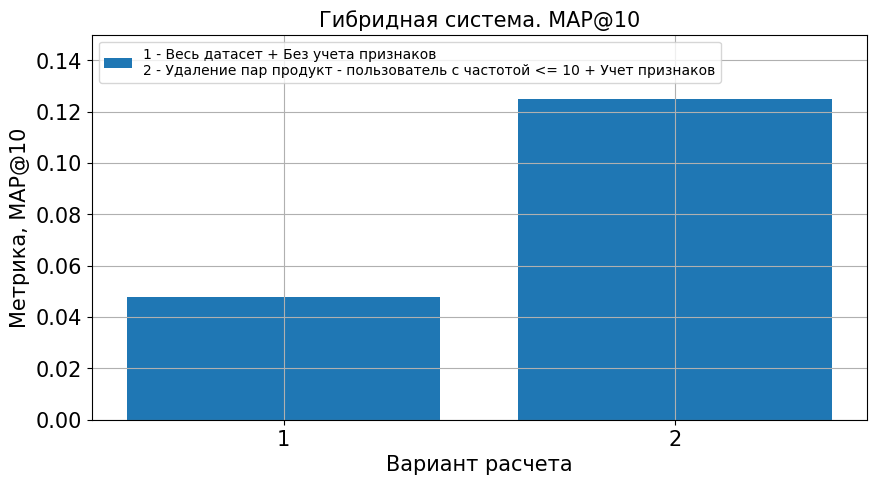

In [ ]:
results = [0.048, 0.125]
index = np.arange(1, len(results) + 1)

plt.figure(figsize=(10, 5))
plt.bar(index, results)
plt.title('Гибридная система. MAP@10', fontsize = 15)
plt.xticks(index,index, rotation = 0, fontsize = 15)
plt.legend([
'1 - Весь датасет + Без учета признаков\n\
2 - Удаление пар продукт - пользователь с частотой <= 10 + Учет признаков'],
           loc='upper left',) # bbox_to_anchor=(1, 0.5)
plt.yticks(fontsize = 15)
plt.ylim([0, 0.15])
plt.xlabel('Вариант расчета', fontsize = 15)
plt.ylabel('Метрика, MAP@10', fontsize = 15)
plt.grid()

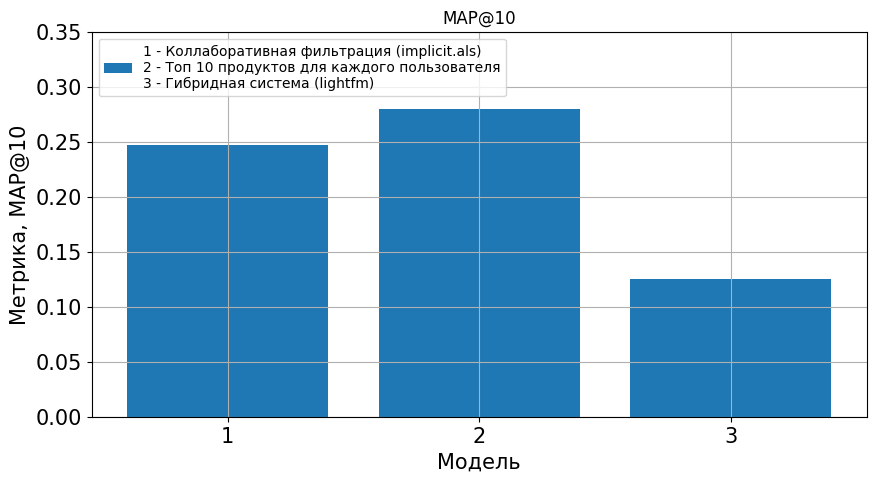

In [ ]:
results = [0.247, 0.28, 0.125]
index = np.arange(1, len(results) + 1)

plt.figure(figsize=(10, 5))
plt.bar(index, results)
plt.title('MAP@10')
plt.xticks(index,index, rotation = 0, fontsize = 15)
plt.legend([
'1 - Коллаборативная фильтрация (implicit.als)\n\
2 - Топ 10 продуктов для каждого пользователя\n\
3 - Гибридная система (lightfm)'],
           loc='upper left',) # bbox_to_anchor=(1, 0.5)
plt.yticks(fontsize = 15)
plt.ylim([0, 0.35])
plt.xlabel('Модель', fontsize = 15)
plt.ylabel('Метрика, MAP@10', fontsize = 15)
plt.grid()

In [ ]:
%%capture
!pip install kaggle
!cp /kaggle/input/kaggle-key/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
data_res.to_csv('submission.csv', index=False)

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sstrakhov","key":"38461345f13205bfc2a1bc465526818c"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions submit \
  -c skillbox-recommender-system \
  -f submission.csv \
  -m "Сабмит. Автор: Станислав Страхов."

100% 6.17M/6.17M [00:00<00:00, 18.9MB/s]
Successfully submitted to Skillbox - диплом по рекомендательным системам